In [516]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import time
from time import gmtime, strftime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [517]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [518]:
df.shape

(150, 8)

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [520]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


Data cleaning

In [521]:
#We remove rows where the target variable is missing
df = df.dropna(axis=0, subset=['Weekly_Sales'])

In [522]:
#We remove rows where date is missing
#df = df.dropna(axis=0, subset=['Date'])
#df.shape

In [523]:
#We format the date column
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\frede\AppData\Local\Temp\ipykernel_3648\4284628287.py:2: UserWarning: Parsing '18-02-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\frede\AppData\Local\Temp\ipykernel_3648\4284628287.py:2: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\frede\AppData\Local\Temp\ipykernel_3648\4284628287.py:2: UserWarning: Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\frede\AppData\Local\Temp\ipykernel_3648\4284628287.py:2: UserWarning: Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\frede\AppData\Local\Temp\ip

In [524]:
df.head

<bound method NDFrame.head of      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      6.0 2011-02-18    1572117.54           NaN        59.61       3.045   
1     13.0 2011-03-25    1807545.43           0.0        42.38       3.435   
3     11.0        NaT    1244390.03           0.0        84.57         NaN   
4      6.0 2010-05-28    1644470.66           0.0        78.89       2.759   
5      4.0 2010-05-28    1857533.70           0.0          NaN       2.756   
..     ...        ...           ...           ...          ...         ...   
145   14.0 2010-06-18    2248645.59           0.0        72.62       2.780   
146    7.0        NaT     716388.81           NaN        20.74       2.778   
147   17.0 2010-11-06     845252.21           0.0        57.14       2.841   
148    8.0 2011-12-08     856796.10           0.0        86.05       3.638   
149   19.0 2012-04-20    1255087.26           0.0        55.20       4.170   

            CPI  Unemployment  
0

In [525]:
#We add the day of the week
#df["weekday_name"] = df["Date"].dt.day_name()
df["month_name"] = df["Date"].dt.month_name()
df['month'] = df["Date"].dt.month
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_name,month
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,February,2.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,March,3.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,May,5.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,May,5.0
...,...,...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,June,6.0
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,November,11.0
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,December,12.0


In [526]:
df["Store"] = df["Store"].astype(str)

In [527]:
# for index,row in df.iterrows():
#      d = time.strptime(row['Date'],"%Y-%M-%d")
#      row["week_number"] = strftime(d,'%U')

df["week_number"] = df['Date'].dt.strftime('%U')
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_name,month,week_number
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,February,2.0,07
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,March,3.0,12
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,May,5.0,21
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,May,5.0,21
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,June,6.0,24
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,November,11.0,44
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,December,12.0,49


In [528]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
month_name      13.235294
month           13.235294
week_number     13.235294
dtype: float64

In [529]:
df.sort_values(['Store'],ascending=True).groupby('Store').head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_name,month,week_number
73,1.0,2010-08-27,1449142.92,NaN,85.22,2.619,211.567306,7.787,August,8.0,34
78,1.0,2011-11-18,1539483.70,0.0,62.25,3.308,218.220509,7.866,November,11.0,46
48,1.0,2011-05-08,1624383.75,NaN,91.65,3.684,215.544618,7.962,May,5.0,19
95,1.0,2010-05-14,1494251.50,0.0,74.78,2.854,210.337426,7.808,May,5.0,19
44,1.0,2010-12-02,1641957.44,1.0,38.51,2.548,211.242170,8.106,December,12.0,48
...,...,...,...,...,...,...,...,...,...,...,...
107,8.0,2010-12-02,994801.40,1.0,33.34,2.548,214.621419,6.299,December,12.0,48
118,9.0,2010-06-18,513073.87,NaN,82.99,2.637,215.016648,6.384,June,6.0,24
52,9.0,2010-06-25,509263.28,0.0,85.02,2.653,214.896576,NaN,June,6.0,25
90,9.0,2010-09-07,485389.15,NaN,78.51,2.642,214.656430,6.442,September,9.0,36


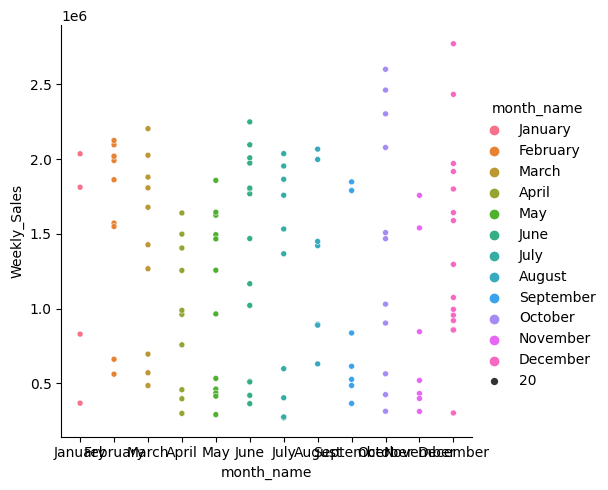

In [530]:
# f,axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
# sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.relplot(data=df.sort_values('month', ascending= True), x="month_name", y="Weekly_Sales", hue="month_name",size=20)
# f.tight_layout()

<AxesSubplot:xlabel='month_name', ylabel='Weekly_Sales'>

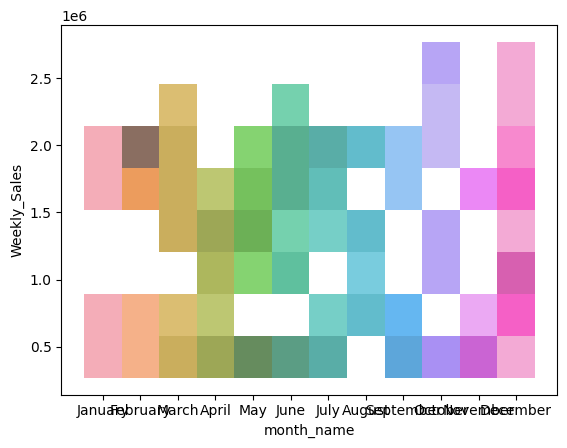

In [531]:
#sns.histplot(data=df, x="weekday", hue="weekday", shrink=.8, alpha=.8, legend=False)
sns.histplot(data=df.sort_values('month', ascending= True), x="month_name", y="Weekly_Sales", hue="month_name", alpha=.8, legend=False)

In [532]:
#sns.scatterplot(data=df, x="weekday", y="Weekly_Sales", hue="weekday")

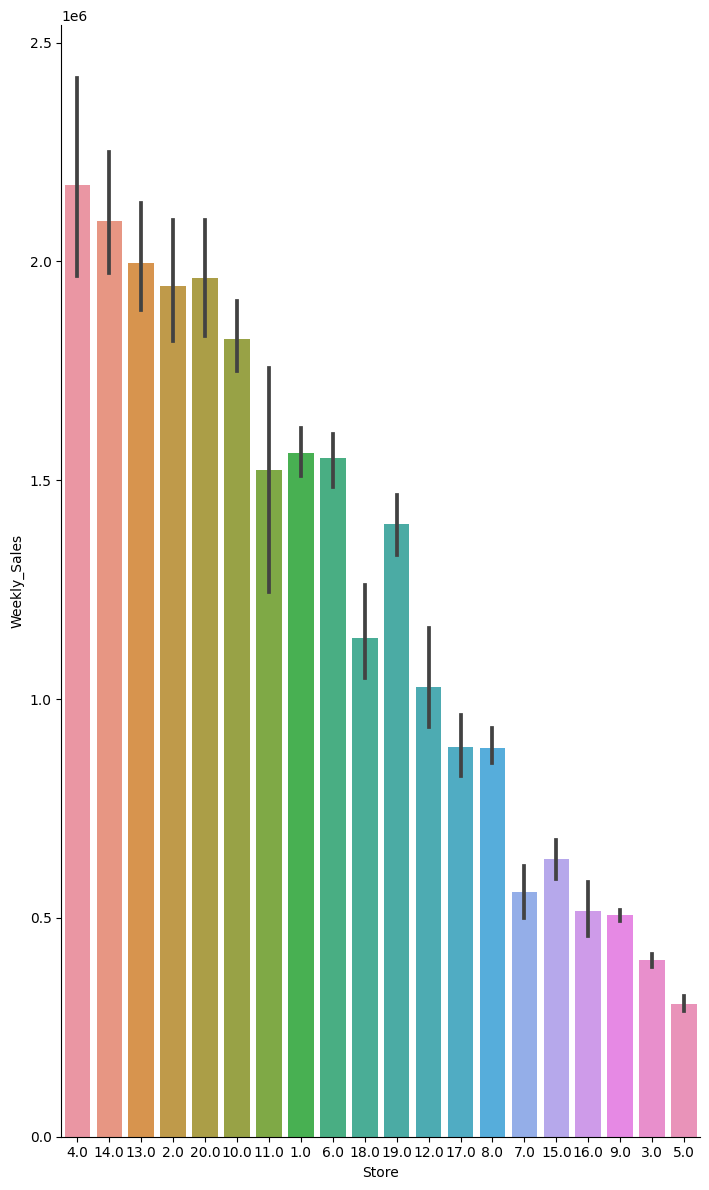

In [533]:
sns.catplot(
    data=df.sort_values('Weekly_Sales', ascending= False), x="Store", y="Weekly_Sales",
    kind="bar", height=12, aspect=.6,
)

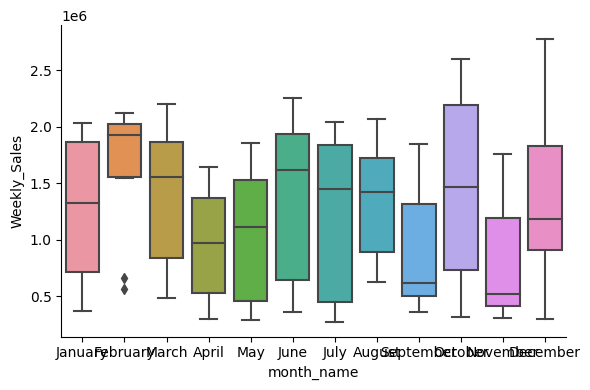

In [534]:
sns.catplot(x='month_name', y = 'Weekly_Sales', 
            data = df.sort_values('month', ascending= True),
            kind = 'box',
            height = 4,
            aspect=1.5)

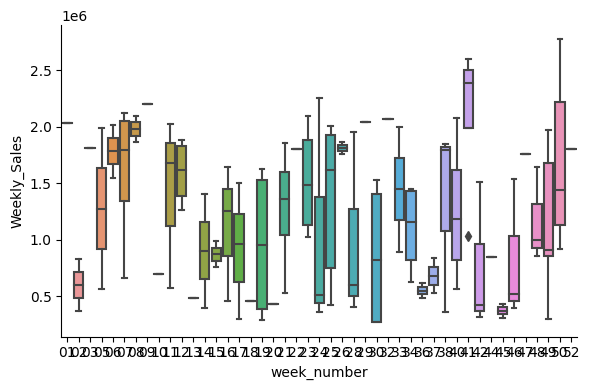

In [535]:
sns.catplot(x='week_number', y = 'Weekly_Sales', 
            data = df.sort_values('week_number', ascending= True),
            kind = 'box',
            height = 4,
            aspect=1.5)

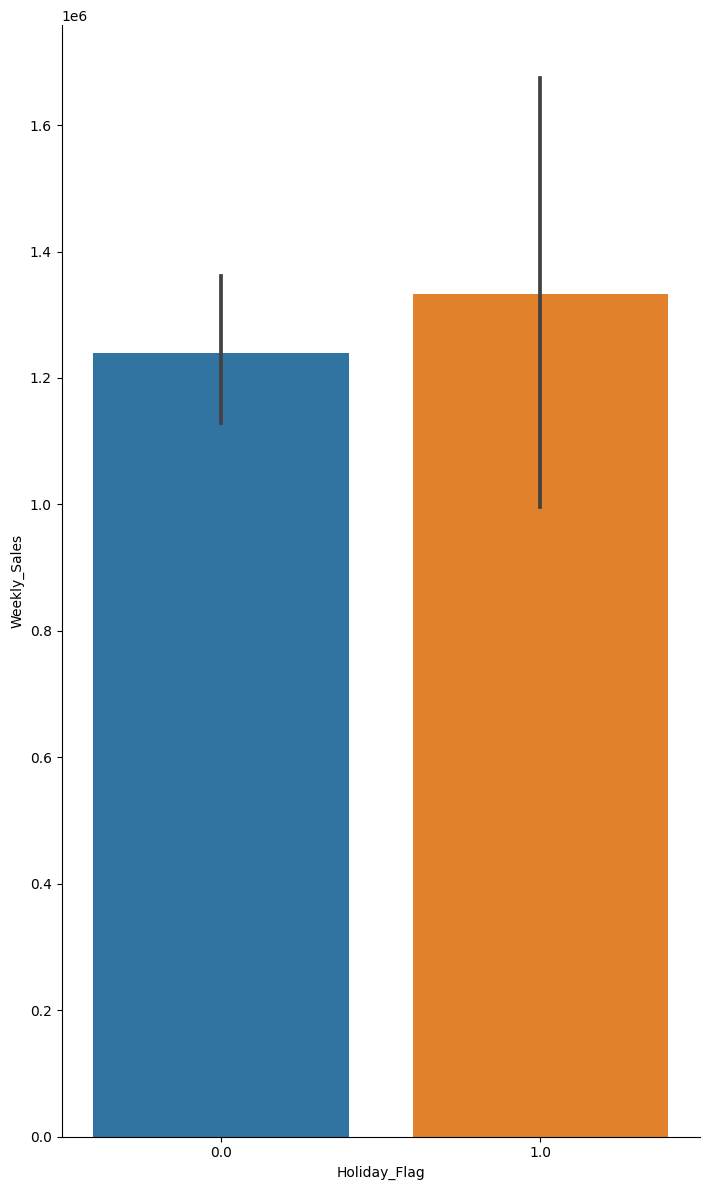

In [536]:
sns.catplot(
    data=df, x="Holiday_Flag", y="Weekly_Sales",
    kind="bar", height=12, aspect=.6,
)

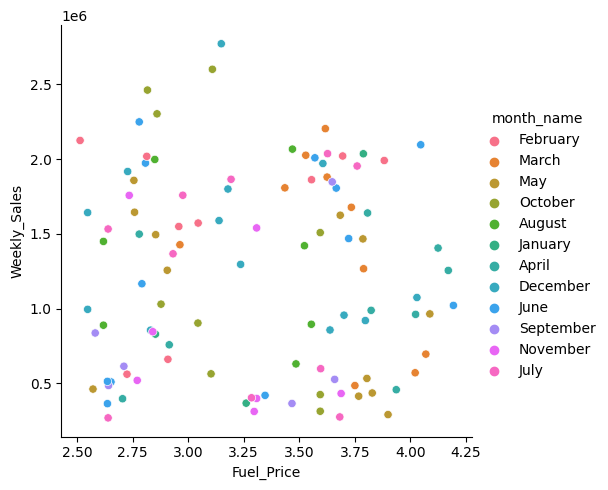

In [537]:
sns.relplot(data=df, x="Fuel_Price", y="Weekly_Sales", hue="month_name")

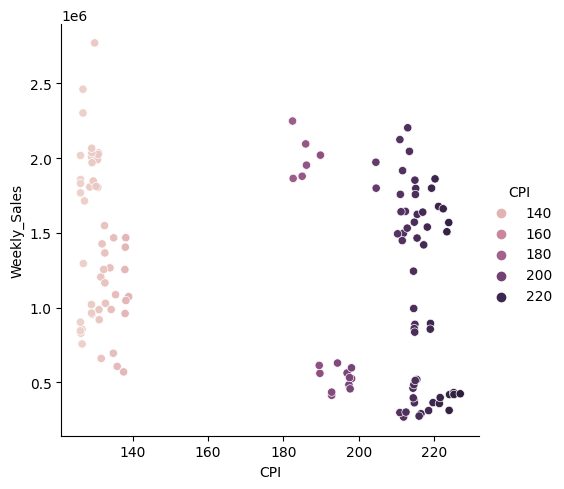

In [538]:
sns.relplot(data=df, x='CPI' , y='Weekly_Sales', hue="CPI")

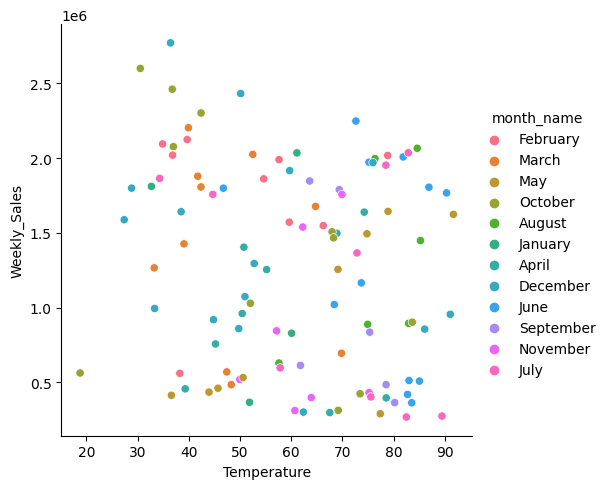

In [539]:
sns.relplot(data=df, x="Temperature", y="Weekly_Sales", hue="month_name")

In [540]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_name,month,week_number
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,February,2.0,07
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,March,3.0,12
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,May,5.0,21
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,May,5.0,21
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,June,6.0,24
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,November,11.0,44
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,December,12.0,49


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_name,month,week_number
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,February,2.0,07
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,March,3.0,12
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,May,5.0,21
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,May,5.0,21
...,...,...,...,...,...,...,...,...,...,...,...
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,June,6.0,24
146,7.0,NaT,716388.81,NaN,20.74,2.778,NaN,NaN,NaN,NaN,NaN
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,November,11.0,44
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,December,12.0,49


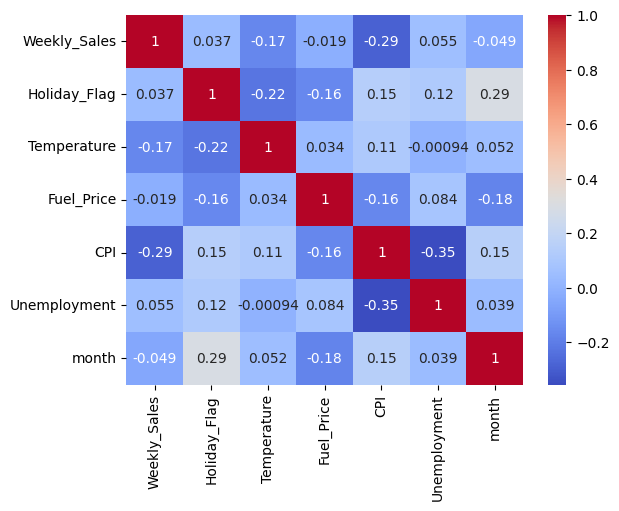

In [541]:
#We build a correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
df

Pre-processing

In [542]:
# Drop useless columns / columns with too many missing values
useless_cols = ['month_name','month', 'Date']

print("Dropping useless columns...")
df = df.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis
# never hesitate to look at a function's documentation using the command name_of_the_function?
print("...Done.")
print(df.head())

Dropping useless columns...
...Done.
  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0   6.0    1572117.54           NaN        59.61       3.045  214.777523   
1  13.0    1807545.43           0.0        42.38       3.435  128.616064   
3  11.0    1244390.03           0.0        84.57         NaN  214.556497   
4   6.0    1644470.66           0.0        78.89       2.759  212.412888   
5   4.0    1857533.70           0.0          NaN       2.756  126.160226   

   Unemployment week_number  
0         6.858          07  
1         7.470          12  
3         7.346         NaN  
4         7.092          21  
5         7.896          21  


In [543]:
print('Dropping outliers...')

for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']:
    to_keep = (df[col] < df[col].mean() + 3*df[col].std()) & (df[col] > df[col].mean() - 3*df[col].std()) | df[col].isna()
    df = df.loc[to_keep,:]
print('Done. Number of lines remaining : ', df.shape[0])
print()

df.head()

Dropping outliers...
Done. Number of lines remaining :  131



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week_number
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,07
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,12
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,21
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,21


In [544]:
# Separate target variable Y from features X


print("Separating labels from features...")
features_list = ["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","week_number"]
target_variable = 'Weekly_Sales'

X = df.loc[:,features_list] 
Y = df.loc[:,target_variable]

print("...Done.")
print()
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.

0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

  Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0   6.0           NaN        59.61       3.045  214.777523         6.858   
1  13.0           0.0        42.38       3.435  128.616064         7.470   
3  11.0           0.0        84.57         NaN  214.556497         7.346   
4   6.0           0.0        78.89       2.759  212.412888         7.092   
5   4.0           0.0          NaN       2.756  126.160226         7.896   

  week_number  
0          07  
1          12  
3         NaN  
4          21  
5          21  



In [545]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [546]:
# Create pipeline for numeric features
numeric_features = ["Temperature","Fuel_Price", "CPI", "Unemployment","week_number"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag']  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

In [547]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [548]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()




Performing preprocessings on train set...
  (0, 0)	1.4631556723366954
  (0, 1)	0.3080695702984372
  (0, 2)	-1.3593111676577667
  (0, 3)	-1.8421346343631164
  (0, 4)	0.3425345586906512
  (0, 17)	1.0
  (1, 0)	0.1389179701602295
  (1, 1)	-0.04811858638413535
  (1, 2)	0.9894022958143975
  (1, 3)	0.5227467779469824
  (1, 4)	1.3320788393525322
  (2, 0)	-2.2866776776938877
  (2, 1)	-1.1985399620048696
  (2, 2)	-1.2956458463027927
  (2, 3)	1.9446556739174115
  (2, 4)	-0.1168967144737936
  (2, 12)	1.0
  (3, 0)	0.5461477380184356
  (3, 1)	-0.937482803690934
  (3, 2)	-1.2754547276739088
  (3, 3)	0.08585036941714648
  (3, 4)	-0.4349645189722554
  (3, 12)	1.0
  (4, 0)	0.1460311538782766
  (4, 1)	0.3058572214991668
  (4, 2)	0.8402131557826302
  (4, 3)	-0.6458579883520674
  (4, 4)	1.5441240423515068
  (4, 18)	1.0

Performing preprocessings on test set...
...Done.
  (0, 0)	0.012658959164890387
  (0, 1)	0.49833156703571313
  (0, 2)	1.1452182084019888
  (0, 3)	-0.5766782890720704
  (0, 4)	-0.11689671447

In [549]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [550]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[2163898.19736534 1595742.63892046 1203738.66714673 1252238.87576988
  299141.31675341  817776.83479458 2077552.35192401 2052484.96452557
  477351.66529773 2126515.14476819 1451216.31031244  488542.61811214
 2012129.83378931 1556404.3181198  1388797.43240343 1952544.137075
 2092795.59099061 2052118.4471035  1648579.02369888 1939136.48693299
 2036665.92563328 1794317.04631582 1989008.23696883  609794.86628748
 1558847.87259027  536303.13467001 1478040.9461531   495015.24630521
  464389.1414903  2017017.84251406 1370123.28617582  956015.74387896
 1926543.55780535 2051579.33908045 1357708.18764466 1942344.4081901
 1925808.1982306  1020831.84692748  528144.80684273  331371.80707435
 2051280.03927366 1982050.03082156 1509352.50917881  580726.54769167
 1638597.44225687 1455609.20868783  201578.25679069 1539518.54821667
 2109222.37082659  632293.73949705 1999476.60995739  840879.7539773
  365270.84236081 1001587.8320481  1958807.8762252  1394520.1479294

In [551]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 390480.11920831  441263.45688695 1036294.74106798  985684.94198724
  306034.15553899 1884248.92443491 1408280.93934041 1009353.2738506
 1098364.72870288  896031.84295984 1825166.11690555 2333736.13701914
 1306689.98451969  768807.24926038 1178280.28314826  367212.75189178
 2241170.61051141  393670.06472029 1563984.56186417 1967081.45969102
  973295.99553533  423735.5189589   310811.32219578 2011712.34772966
 1988476.31874153 1623178.88307419  132698.38009561]



In [552]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9669025299547387
R2 score on test set :  0.9381670450140863


In [553]:
regressor.coef_

array([  -28251.12071022,   -53953.11141023,    84263.51591222,
         -82886.58492538,    41361.78151533,   676878.76751475,
          46915.23539274,   591965.51528004,   686304.13972456,
        -639483.26228181, -1096641.66713636,  -589529.31750838,
        -152263.0066391 ,    85810.12751505,   382684.51731195,
         396183.83571668, -1223671.76780278,   667607.44153771,
       -1370363.29464482,   -59295.46053371,  -889230.69516563,
        -777917.37071893, -1236017.77970808,   -72211.44458502])

In [554]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week_number', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_2.0', 'x0_20.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x1_1.0']


In [555]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-2.825112e+04
Fuel_Price,-5.395311e+04
CPI,8.426352e+04
Unemployment,-8.288658e+04
week_number,4.136178e+04
x0_10.0,6.768788e+05
x0_11.0,4.691524e+04
x0_13.0,5.919655e+05
x0_14.0,6.863041e+05
x0_15.0,-6.394833e+05
